In [2]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import glob
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

from scipy import stats
from mne.viz import circular_layout, plot_connectivity_circle
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
import pyreadstat

from matplotlib import cm
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from statannot import add_stat_annotation
from scipy.stats import ttest_ind, f_oneway
import matplotlib.pyplot as plt
import os
import math

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

D:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# variance test

In [ ]:
root_path = r'H:\Matlab\Work\Age\Gift_FCM\ICA\DFNC\TR_30\Dmatrix_stat_subjid\NMA_graph'
state_name = ['State1','State2','State3','State4']
NMN = ['Assortativity','R_Assortativity','Synchronization','R_Synchronization','Hierarchy','R_Hierarchy',
       'gEfficiency','ModularityQ','R_ModularityQ','NumModularity',
       'R_NumModularity','Gamma','Lambda','Sigma','ClusteringCOff',
       'ShorestPath','LocalEfficiency','Volunerable','EdgeBetwenness']
for state in state_name:
    with open('./state_top/variance_result.txt','a+') as file:
        file.write(f'********************* {state}*****************\n')
        for nmn in NMN:
            nam_path = os.path.join(root_path,state,nmn+'.txt')
            graph_measrue = np.loadtxt(nam_path) 
            if nmn == 'gEfficiency':
                nmn = 'GlobalEfficiency'
            elif nmn == 'Sigma':
                 nmn = 'Smallworld'
            graph_dict[nmn].extend(graph_measrue.tolist())
            f,p = f_oneway(graph_measrue[34:62],graph_measrue[:34])
    #         if p<0.05:

            file.write(f'==> ==> ==> {nmn}: F: {f},P: {p}\n')
            print(f,p)
            
            break
    break

In [125]:
root_path = r'H:\Matlab\Work\Age\Gift_FCM\ICA\DFNC\TR_30\Dmatrix_stat_subjid\NMA_graph'
state_name = ['State1','State2','State3','State4']
# NMN = ['Assortativity','R_Assortativity','Synchronization','R_Synchronization','Hierarchy','R_Hierarchy',
#        'gEfficiency','ModularityQ','R_ModularityQ','NumModularity',
#        'R_NumModularity','Gamma','Lambda','Sigma','ClusteringCOff',
#        'ShorestPath','LocalEfficiency','Volunerable','EdgeBetwenness'] # Network Measurement Analysis
# auc_name = [['aEg','aEloc'],['aSigma','aCp','aLp'],['arzscore'],['abzscore']]
a_groupid = ['Youger']*34 +['Elder']*28+['Youger']*34 +['Elder']*28+['Youger']*34 +['Elder']*28+['Youger']*34 +['Elder']*28
state_id = ["1"]*62 +["2"]*62+["3"]*62+["4"]*62
graph_dict = {}  
graph_dict['Age'] =a_groupid
graph_dict['State'] =state_id
for nmn in NMN:
    if nmn == 'gEfficiency':
        nmn = 'GlobalEfficiency'
    elif nmn == 'Sigma':
         nmn = 'Smallworld'
    graph_dict[nmn] =[]

for state in state_name:
    for nmn in NMN:
        nam_path = os.path.join(root_path,state,nmn+'.txt')
        graph_measrue = np.loadtxt(nam_path) 
        if nmn == 'gEfficiency':
            nmn = 'GlobalEfficiency'
        elif nmn == 'Sigma':
             nmn = 'Smallworld'
        graph_dict[nmn].extend(graph_measrue.tolist())
        t,p = ttest_ind(graph_measrue[34:62],graph_measrue[:34],nan_policy = 'omit')
        if p<0.05:
            print(state,nmn)
            print(t,p)
#     break

State2 Smallworld
-2.5825867448473545 0.012263358287351605
State3 Smallworld
9.964779415138635 2.4427380504309227e-14


In [3]:
nmn_df = pd.DataFrame(graph_dict)
# resultfile = r'.\state_top\test_result.txt'
# with open(resultfile,'a+') as rf:
#     rf.write('************t-test independent samples with Bonferroni correction*********** \n')
#     rf.close()

In [4]:
nmn_df

,Age,State,Assortativity,R_Assortativity,Synchronization,R_Synchronization,Hierarchy,R_Hierarchy,GlobalEfficiency,ModularityQ,R_ModularityQ,NumModularity,R_NumModularity,Gamma,Lambda,Smallworld,ClusteringCOff,ShorestPath,LocalEfficiency,Volunerable,EdgeBetwenness
0,Youger,1,NaN,-0.038014,NaN,0.000000,NaN,0.017634,0.126285,NaN,0.001459,NaN,0.75,1.001675,1.217878,0.388119,0.231835,2.322061,2.322061,0.060368,0.489800
1,Youger,1,NaN,-0.038014,NaN,0.000000,NaN,0.017634,0.126285,NaN,0.001459,NaN,0.75,1.524926,1.219123,0.464838,0.231835,2.322061,2.322061,0.060368,0.489800
2,Youger,1,4.989563,0.139369,-1.600116,0.010218,-0.662291,0.004166,0.247141,5.139730,0.116337,0.051532,1.70,1.205346,0.520560,1.000281,0.250554,0.936823,0.936823,0.115267,4.597340
3,Youger,1,NaN,-0.038014,NaN,0.000000,NaN,0.017634,0.126285,NaN,0.001459,NaN,0.75,0.977512,1.212306,0.380016,0.231835,2.322061,2.322061,0.060368,0.489800
4,Youger,1,4.854386,0.140203,-3.518343,0.003527,-1.492270,-0.010062,0.241354,3.627909,0.096672,0.400876,2.00,1.139492,0.546142,0.900476,0.241449,0.990327,0.990327,0.125958,3.975311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,Elder,4,NaN,-0.038014,NaN,0.000000,NaN,0.017634,0.126285,NaN,0.001459,NaN,0.75,1.099971,1.214976,0.398990,0.231835,2.322061,2.322061,0.060368,0.489800
244,Elder,4,NaN,-0.038014,NaN,0.000000,NaN,0.017634,0.126285,NaN,0.001459,NaN,0.75,1.196491,1.205856,0.422697,0.231835,2.322061,2.322061,0.060368,0.489800
245,Elder,4,NaN,-0.038014,NaN,0.000000,NaN,0.017634,0.126285,NaN,0.001459,NaN,0.75,0.997924,1.210885,0.380608,0.231835,2.322061,2.322061,0.060368,0.489800
246,Elder,4,4.417237,0.139530,-4.720521,0.033377,-0.350023,0.014907,0.250074,8.494770,0.152587,0.138873,1.80,1.389488,0.519961,1.103483,0.256762,0.945961,0.945961,0.104785,5.007923


In [32]:
with open('./state_top/2variance_result.txt','a+') as rf:
#     rf.write('************t-test independent samples with Bonferroni correction*********** \n')
#     rf.close()
    for nmn in NMN:
        if nmn == 'gEfficiency':
            nmn = 'GlobalEfficiency'
        elif nmn == 'Sigma':
             nmn = 'Smallworld'
        rf.write(f'\n********************* {nmn}***************** \n')
        formura = f"{nmn}~C(Age)+C(State)+C(Age):C(State)"
        anova_result = anova_lm(ols(formura,nmn_df).fit())
        f1 = anova_result['F'][0]
        f2 = anova_result['F'][1]
        f3 = anova_result['F'][2]
        p1 = anova_result['PR(>F)'][0] 
        p2 = anova_result['PR(>F)'][1]
        p3 = anova_result['PR(>F)'][2]
        rf.write(f'==> ==> ==>F_age: {f1}, P:{p1}, {p1 <0.05}\n')
        rf.write(f'==> ==> ==>F_state: {f2},P:{p2}, {p2 <0.05}\n')
        
        rf.write(f'==> ==> ==>F_com: {f3},P:{p3}, {p3 <0.05}\n')
        print(anova_result)
        
    rf.close()

                    df      sum_sq    mean_sq          F        PR(>F)
C(Age)             1.0    0.868082   0.868082   0.916104  3.404243e-01
C(State)           3.0   90.052062  30.017354  31.677909  3.730984e-15
C(Age):C(State)    3.0    4.504792   1.501597   1.584666  1.966578e-01
Residual         120.0  113.709604   0.947580        NaN           NaN
                    df    sum_sq   mean_sq          F        PR(>F)
C(Age)             1.0  0.001543  0.001543   0.302407  5.828889e-01
C(State)           3.0  0.118714  0.039571   7.753199  5.797124e-05
C(Age):C(State)    3.0  0.337166  0.112389  22.020214  1.245367e-12
Residual         240.0  1.224934  0.005104        NaN           NaN
                    df      sum_sq   mean_sq         F    PR(>F)
C(Age)             1.0    9.627185  9.627185  4.801024  0.030375
C(State)           3.0    8.186734  2.728911  1.360893  0.258095
C(Age):C(State)    3.0    1.442936  0.480979  0.239861  0.868392
Residual         120.0  240.628291  2.005236 

In [22]:
print(f'{anova_result['PR(>F)'][0]}')

SyntaxError: invalid syntax (<ipython-input-22-0e6e91a5b14a>, line 1)

In [ ]:
# graph_dict
def test_draw(nmn_df,nmn_name):
    for ylabel in nmn_name:
        ax = sns.violinplot(x='State', y=f'{ylabel}', hue='Age', data=nmn_df,
                       order=None, hue_order=None, bw='scott',
                       cut=2, scale='area', scale_hue=True, gridsize=100, 
                       width=0.8,inner='box', split=False, dodge=True,
                       orient=None, linewidth=None,color=None, palette='Set2',
                       saturation=0.75, ax=None)


        pairs= [ 
                #(("1","Youger"),("1","Elder")),
                (("2","Youger"),("2","Elder")),\
                #(("3","Youger"),("3","Elder")),\
               #(("4","Youger"),("4","Elder")),
                ]
        sns.despine(ax =ax)
# test = ttest_ind(permutations=5000)
        ax, test_results = add_stat_annotation(ax, box_pairs = pairs, data = nmn_df,
                    test='t-test_ind',
#                     perform_stat_test=False, 
#                     pvalues=[0.000199960007998400,0.000199960007998400],
#                             test_short_name='test',
                            text_format='star',
                    line_offset_to_box= 0.2, line_offset=0.01, line_height=0.01, text_offset=0.08,
                    loc='inside',x="State", y=f'{ylabel}',hue ='Age',verbose=2)

#         plt.savefig(f'.\state_top\\{ylabel}.png', dpi=300, bbox_inches='tight')
#         plt.close()
        
#         resultfile = r'.\state_top\test_result.txt'
#         with open(resultfile,'a+') as rf:
#             rf.write(f'*********************{ylabel}***************** \n')
#             for tr in test_results:
#                 rf.write(f'\t \t \t state:{tr.box1[0]} {str(tr.formatted_output)}, {tr.pval<0.05} \n')
#         rf.close()
        
        plt.savefig(f'./state_top/{ylabel}.png', dpi=300, bbox_inches='tight')
        plt.close()
        
        
# test_draw(nmn_df,NMN)

draw_list = ['LocalEfficiency','gEfficiency','ClusteringCOff','R_ModularityQ', 'R_NumModularity'
             ,'R_Assortativity','R_Synchronization','Sigma','Volunerable']
test_draw(nmn_df,draw_list)

In [ ]:
floor(0/3)

In [102]:
# draw_list = ['GlobalEfficiency','LocalEfficiency','ClusteringCOff','R_ModularityQ', 'R_NumModularity'
#              ,'R_Assortativity', 'R_Synchronization' ,'Smallworld','Volunerable']
draw_list = ['R_Synchronization','Hierarchy']
F1 = [['F_age  =  12.52,P = 0.0004','F_state = 60.21,P = 0.0000'],['F_age = 8.7418,P = 0.0037','F_state = 21.3288,P = 0.0000']]

# test_draw(nmn_df,draw_list)
test_draw_subplot(nmn_df,draw_list,F1)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2_Youger v.s. 2_Elder: t-test independent samples with Bonferroni correction, P_val=1.676e-02 stat=2.727e+00
3_Youger v.s. 3_Elder: t-test independent samples with Bonferroni correction, P_val=6.231e-15 stat=-1.051e+01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2_Youger v.s. 2_Elder: t-test independent samples with Bonferroni correction, P_val=1.361e-02 stat=-2.564e+00


In [100]:
# graph_dict
def test_draw_subplot(nmn_df,nmn_name,F1):
#     print(nmn_name)
    fig = plt.figure(figsize=(15, 6), facecolor='white')
    for num,ylabel in enumerate(nmn_name):
        
        plt.subplot(1,2,num+1)
        ax = sns.violinplot(x='State', y=f'{ylabel}', hue='Age', data=nmn_df,
                       order=None, hue_order=None, bw='scott',
                       cut=2, scale='area', scale_hue=True, gridsize=100, 
                       width=0.8,inner='box', split=False, dodge=True,
                       orient=None, linewidth=None,color=None, palette='Set2',
                       saturation=0.75, ax=None)
        sns.despine(ax =ax)
        if num == 1:
            pairs= [ 
                    #(("1","Youger"),("1","Elder")),
                    (("2","Youger"),("2","Elder")),\
                    #(("3","Youger"),("3","Elder")),\
                   #(("4","Youger"),("4","Elder")),
                    ]
            txta = 1.0
            txtb = -3.3
            ax, test_results = add_stat_annotation(ax, box_pairs = pairs, data = nmn_df,
                    test='t-test_ind',
#                     perform_stat_test=False, 
#                     pvalues=[0.000199960007998400,0.000199960007998400],
#                             test_short_name='test',
                            text_format='star',
                    line_offset_to_box= 0.2, line_offset=0.01, line_height=0.01, text_offset=0.08,
                    loc='inside',x="State", y=f'{ylabel}',hue ='Age',verbose=2)
            
            s = F1[num]
            for s1 in s:
                plt.text(txta,txtb,s1,fontsize=12)
                txtb = txtb-0.3
            
        else:
                pairs= [ 
                    #(("1","Youger"),("1","Elder")),
                    (("2","Youger"),("2","Elder")),\
                    (("3","Youger"),("3","Elder")),\
                   #(("4","Youger"),("4","Elder")),
                    ]
                txta = 2.4
                txtb = -0.020
                ax, test_results = add_stat_annotation(ax, box_pairs = pairs, data = nmn_df,
                    test='t-test_ind',
#                     perform_stat_test=False, 
#                     pvalues=[0.000199960007998400,0.000199960007998400],
#                             test_short_name='test',
                            text_format='star',
                    line_offset_to_box= 0.2, line_offset=0.01, line_height=0.01, text_offset=0.08,
                    loc='inside',x="State", y=f'{ylabel}',hue ='Age',verbose=2)
                s = F1[num]
                for s1 in s:
                    plt.text(txta,txtb,s1,fontsize=12)
                    txtb = txtb-0.0070
        
# test = ttest_ind(permutations=5000)
       
        
#         plt.savefig(f'.\state_top\State_Grpah.png', dpi=300, bbox_inches='tight')
#     plt.close()
        
#         resultfile = r'.\state_top\test_result.txt'
#         with open(resultfile,'a+') as rf:
#             rf.write(f'*********************{ylabel}***************** \n')
#             for tr in test_results:
#                 rf.write(f'\t \t \t state:{tr.box1[0]} {str(tr.formatted_output)}, {tr.pval<0.05} \n')
#         rf.close()
        
    plt.savefig(f'./state_top/F.png', dpi=300, bbox_inches='tight')
    plt.close()

In [ ]:
def test_and_draw(root_path,nmn,auc_name,state_name): # nmn network measure name
#     f=plt.figure()
#     num_of_plot = len(auc_name)
    
    for num,auc in enumerate(auc_name):
#         f.add_subplot(num_of_plot,1,num+1)
        nmn_dict = {}
        nmn_dict["Age"]= a_groupid
        nmn_dict['State'] = state_id 
        state_base_auc =[]
        for sname in state_name:
            nma_path = os.path.join(root_path,sname,nmn,auc)+'.txt'
            nm_value = np.loadtxt(nma_path)
            nm_value[np.isnan(nm_value)] = 0
            state_base_auc.extend(nm_value)
            print(nma_path)
        print(len(state_base_auc))
        ylabel = auc[1:]
        nmn_dict[f'{ylabel}'] = state_base_auc
        nmn_df = pd.DataFrame(nmn_dict)
        print(nmn_df)
        
        ax = sns.violinplot(x='State', y=f'{ylabel}', hue='Age', data=nmn_df,
                   order=None, hue_order=None, bw='scott',
                   cut=2, scale='area', scale_hue=True, gridsize=100, 
                   width=0.8,inner='box', split=False, dodge=True,
                   orient=None, linewidth=None,color=None, palette='Set2',
                   saturation=0.75, ax=None)
        
        
        pairs= [ 
                #(("1","Youger"),("1","Elder")),
                (("2","Youger"),("2","Elder")),\
                (("3","Youger"),("3","Elder")),\
               #(("4","Youger"),("4","Elder")),
                ]
        sns.despine(ax =ax)
# test = ttest_ind(permutations=5000)
        add_stat_annotation(ax, box_pairs = pairs, data = nmn_df,
                    test='t-test_ind',
#                     perform_stat_test=False, 
#                     pvalues=[0.000199960007998400,0.000199960007998400],
#                             test_short_name='test',
                            text_format='star',
                    line_offset_to_box= 0.2, line_offset=0.01, line_height=0.01, text_offset=0.08,
                    loc='inside',x="State", y=f'{ylabel}',hue ='Age',verbose=2)
        
        plt.savefig(f'{nmn}_{ylabel}.png', dpi=300, bbox_inches='tight')
        plt.close()
        
test_and_draw(root_path,NMN[0],auc_name[0],state_name)

# 'Hierarchy' 2： P_val=4.034e-04 stat=-4.166e+00  3：P_val=6.380e-03 stat=3.307e+00
# 'Assortativity' 2：P_val=2.693e-04 stat=4.284e+00  3：P_val=7.602e-11 stat=-8.241e+00
# 'SmallWorld'  Cp: 2: P_val=1.025e-03 stat=3.887e+00 3:P_val=1.436e-16 stat=-1.173e+01
#               lp = 2: P_val=2.768e-02 stat=2.797e+00  3:P_val=1.436e-16 stat=-1.173e+01
#               sigma = 2:P_val=6.819e-05 stat=4.676e+00 3:P_val=3.228e-15 stat=-1.088e+0


# global : 2_Youger v.s. 2_Elder: t-test independent samples with Bonferroni correction, P_val=7.180e-03 stat=3.268e+00
        # 1_Youger v.s. 1_Elder: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=7.783e-01
        # 3_Youger v.s. 3_Elder: t-test independent samples with Bonferroni correction, P_val=7.294e-12 stat=-8.842e+00
        # 4_Youger v.s. 4_Elder: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=9.604e-01
        
#  local: 2_Youger v.s. 2_Elder: t-test independent samples with Bonferroni correction, P_val=2.788e-03 stat=3.576e+00
        # 1_Youger v.s. 1_Elder: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=9.731e-01
        # 3_Youger v.s. 3_Elder: t-test independent samples with Bonferroni correction, P_val=7.095e-13 stat=-9.445e+00
        # 4_Youger v.s. 4_Elder: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=9.053e-01

# Network

In [39]:
age = pd.read_excel(r'H:\Jupyter\Age\age.xlsx')
y_data = age['label'].tolist()
y_data = np.array(y_data)
ages =np.array(age['Age_Years']) 

In [40]:
ages

array([22, 22, 26, 20, 32, 19, 19, 20, 20, 24, 21, 22, 21, 22, 19, 20, 22,
       29, 20, 30, 21, 20, 32, 21, 20, 21, 19, 23, 24, 23, 24, 20, 19, 18,
       65, 78, 75, 73, 80, 71, 72, 65, 78, 66, 67, 66, 64, 75, 69, 66, 61,
       63, 73, 77, 68, 70, 68, 74, 75, 72, 61, 63], dtype=int64)

In [77]:
measure = np.nan_to_num(subj_graph['Sigma'])

5.477481832229394 6.685252024224927e-08


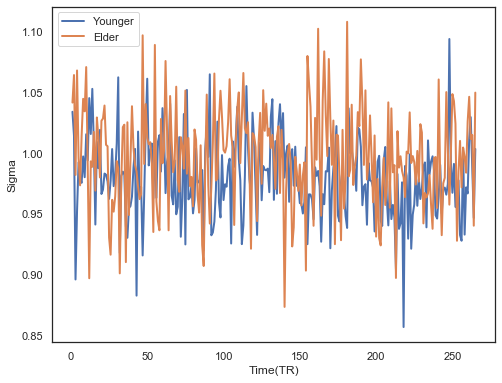

In [124]:
root_path = r'H:\Matlab\Work\Age\Gift_FCM\ICA\DFNC\TR_30\Dgraph'
# state_name = ['State1','State2','State3','State4']
# NMN = ['gEfficiency','LocalEfficiency','Synchronization','Hierarchy','NumModularity','ModularityQ',
#        'ShorestPath','ClusteringCOff','EdgeBetwenness'] 
# NMN = ['ShorestPath','ClusteringCOff'] 
NMN = ['Sigma']
# NMN = ['Assortativity','R_Assortativity','Synchronization','R_Synchronization','Hierarchy','R_Hierarchy',
#        'gEfficiency','ModularityQ','R_ModularityQ','NumModularity',
#        'R_NumModularity','Gamma','Lambda','Sigma','ClusteringCOff',
#        'ShorestPath','LocalEfficiency','Volunerable','EdgeBetwenness']
fig = plt.figure(figsize=(27, 21), facecolor='white')
# for state in state_name:
subjs = []
for i in range(62):
    if i+1<10:
        subjs.append(f'sub_00{i+1}')
    else:
        subjs.append(f'sub_0{i+1}')

subj_graph ={} 
# file.write(f'********************* {state}*****************\n')
for num,nmn in enumerate(NMN):
#     print(nmn)
#     with open(f'./state_top/dgraph/tp_dgraph.txt','a+') as file:
        subj_graph[nmn] =[]
        for subj_name in subjs:
    #         print(nmn)
            nam_path = os.path.join(root_path,subj_name,nmn+'.txt')
    #         print(nam_path)
            graph_measrue = np.loadtxt(nam_path) 
    #         print(graph_measrue.shape)
    #             file.writelines(f'{graph_measrue} \n')
            subj_graph[nmn].append(graph_measrue) 
        measures = np.nan_to_num(np.array(subj_graph[nmn]))
        
        y_avg = np.mean(np.array(measures)[:34],0) 
        e_avg = np.mean(np.array(measures)[34:62],0)
        age_mea = np.mean(np.array(subj_graph[nmn]),1)
        t,p = ttest_ind(e_avg,y_avg,nan_policy='omit')
#         try:
# #             r,rp = stats.pearsonr(ages,age_mea)
#     #         print(t,p)
# #             file.write(f'{nmn}, T:{t},  P:{p}; Corrleation:{r},P:{rp} \n')
#             file.write(f'{nmn}, T:{t},  P:{p}\n')
#         except Exception:
#             pass
        plt.subplot(3,3,num+1)
        print(t,p)
        plt.plot([i+1 for i in range(265)],y_avg,label = 'Younger',linewidth=2.0)
        plt.plot([i+1 for i in range(265)],e_avg,label = 'Elder',linewidth=2.0)
        font2 = { #'family' : 'Times New Roman',
    'weight' : 'normal',
    'size' : 12,
    }
        plt.xlabel("Time(TR)", font2)
        if nmn == 'gEfficiency':
                nmn = 'GlobalEfficiency'
        elif nmn == 'EdgeBetwenness':
                nmn = 'Betwenness'
        plt.ylabel(f"{nmn}",  font2)
        plt.legend()
#     plt.savefig(f'./state_top/dgraph/{nmn}.png', dpi=300, bbox_inches='tight')

# plt.savefig(f'./state_top/dgraph/smallworld.png', dpi=300, bbox_inches='tight')
# plt.show()
# plt.close()
    
#     np.savetxt(f'./state_top/dgraph/{nmn}.txt', subj_graph[nmn],  delimiter=',')

In [100]:
c = np.concatenate([y_avg,e_avg],0) 
len(sigma_dict['Age'])

521

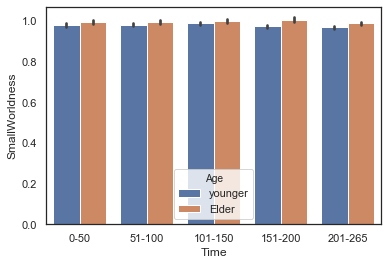

In [118]:
sigma_dict  ={}
sigma_dict['Age'] = ['younger']*265  +['Elder']*265
# sigma_dict['Time'] =  ['0-25']*25 + ['26-50']*25 + ['51-75']*25+ ['76-100']*25+ ['101-125']*25+ ['126-150']*25+ ['151-176']*25+ ['175-200']*25  \
#   +['200-225']*25+ ['225-265']*40 + ['0-25']*25 + ['26-50']*25 + ['51-75']*25+ ['76-100']*25+ ['101-125']*25+ ['126-150']*25+ ['151-176']*25+ ['175-200']*25 \
#   +['200-225']*25+ ['225-265']*40


sigma_dict['Time'] = ['0-50']*50 + ['51-100']*50 + ['101-150']*50 + ['151-200']*50 + ['201-265']*65+ \
['0-50']*50 + ['51-100']*50 + ['101-150']*50 + ['151-200']*50 + ['201-265']*65
sigma_dict['SmallWorldness'] = np.concatenate([y_avg,e_avg],0)
sigma_df = pd.DataFrame(sigma_dict)
sns.barplot(x = 'Time',y = 'SmallWorldness', hue = 'Age', data = sigma_df)

In [73]:
age_mea = np.mean(np.array(subj_graph[nmn]),1)

In [74]:
age_mea.shape

(62,)

In [70]:
# subjs H:\Matlab\Work\Age\Gift_FCM\ICA\DFNC\TR_30\Dgraph\sub_001
# c= np.array(subj_graph['Assortativity'])
# c
# subj_graph
# measures.shape
# measures[:34].shape
y_avg = np.mean(np.array(subj_graph[nmn])[:34],0) 
y_avg.shape
# e_avg = np.mean(np.array(subj_graph[nmn])[34:62],0)

(265,)

In [166]:
y_avg .shape

(265,)

In [ ]:
Nodal

In [3]:
root_path = r'H:\Matlab\Work\Age\Gift_FCM\ICA\DFNC\TR_30\Dnodalgraph'
# state_name = ['State1','State2','State3','State4']
NMN = ['LocalEfficiency','Volunerable1','nodalBetwenness']
fig = plt.figure(figsize=(15, 15), facecolor='white')
# for state in state_name:
subjs = []
for i in range(62):
    if i+1<10:
        subjs.append(f'sub_00{i+1}')
    else:
        subjs.append(f'sub_0{i+1}')
nodalsubj_graph ={} 
# file.write(f'********************* {state}*****************\n')
for num,nmn in enumerate(NMN):
#     print(nmn)
    nodalsubj_graph[nmn] =[]
    for subj_name in subjs:
#         print(nmn)
        nam_path = os.path.join(root_path,subj_name,nmn+'.txt')
#         print(nam_path)
        nodalgraph_measrue = np.loadtxt(nam_path)
        nodalsubj_graph[nmn].append(nodalgraph_measrue) 
    measures = np.array(nodalsubj_graph[nmn])
    print(measures.shape)

(62, 265, 60)
(62, 265, 60)
(62, 265, 60)


<Figure size 1080x1080 with 0 Axes>

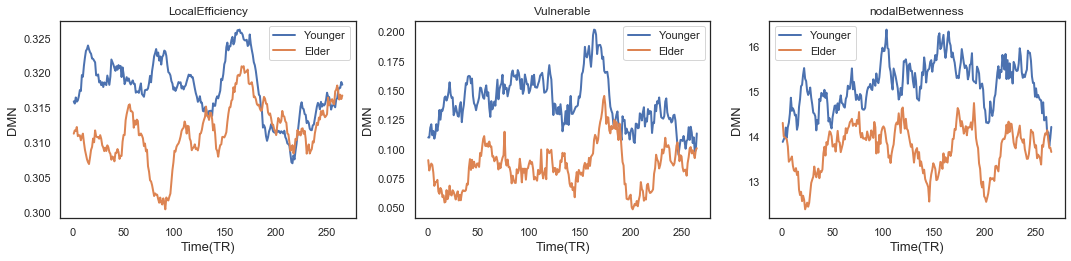

In [50]:
axis = [0,11,17,29,47,54,60]
domain = ['DMN','SMN','VIS','CC',"SC","AUD"]

fig = plt.figure(figsize=(18, 8), facecolor='white')
for num,nmn in enumerate(NMN):
    y_nodalavg = np.mean(np.array(nodalsubj_graph[nmn])[:34],0) 
    e_nodalavg = np.mean(np.array(nodalsubj_graph[nmn])[34:62],0)
    ax = plt.subplot(2,3,num+1)
    y_nodal = np.mean(y_nodalavg[:,0:11],axis = 1)
    e_nodal = np.mean(e_nodalavg[:,0:11],axis = 1)
    plt.plot([i+1 for i in range(265)],y_nodal,label = 'Younger',linewidth=2.0)
    plt.plot([i+1 for i in range(265)],e_nodal,label = 'Elder',linewidth=2.0)
    plt.xlabel("Time(TR)",  size = 13)
    plt.ylabel(f"DMN", size = 13)
    plt.legend()
    if nmn=='Volunerable1':
        ax.set_title('Vulnerable')
    else:
        ax.set_title(f'{nmn}')

# plt.savefig(f'./state_top/dgraph/nodal_DMN_dgraph.png', dpi=300, bbox_inches='tight')
# plt.show()

In [122]:
e_nodalavg.shape
# age_mea = np.mean(np.array(subj_graph[nmn]),1)
np.mean(np.array(nodalsubj_graph[nmn]),1).shape

(62, 60)

In [72]:
np.nan_to_num(nodalsubj_graph[nmn])

KeyError: 'Sigma'

In [71]:
axis = [0,11,17,29,47,54,60]
domain = ['DMN','SMN','VIS','CC',"SC","AUD"]
# with open(f'./state_top/dgraph/nodal_tp_dgraph.txt','a+') as df:
    
for nmn in NMN:
#         df.write(f'\n #################{nmn}######################\n')
    fig = plt.figure(figsize=(18, 8), facecolor='white')
    y_nodalavg = np.mean(np.array(nodalsubj_graph[nmn])[:34],0) 
    e_nodalavg = np.mean(np.array(nodalsubj_graph[nmn])[34:62],0)
    age_mea = np.mean(np.array(nodalsubj_graph[nmn]),1)
    for num,domain_name in enumerate(domain):
        plt.subplot(2,3,num+1)
        y_nodal = np.mean(y_nodalavg[:,axis[num]:axis[num+1]],axis = 1)
        e_nodal = np.mean(e_nodalavg[:,axis[num]:axis[num+1]],axis = 1)
#             print(y_DMN.shape)
        t,p = ttest_ind(e_nodal,y_nodal,nan_policy='omit')
        domain_val = np.mean(age_mea[:,axis[num]:axis[num+1]],1)
        r,rp = stats.pearsonr(ages,domain_val)
#             df.write(f'==> ==> {domain_name},t:{t},P:{p} Corrleation: {r},P:{p} \n')

#         doma
#         t,p = ttest_ind(e_avg,y_avg,nan_policy='omit')
#         try:
# #             r,rp = stats.pearsonr(ages,age_mea)


#         plt.plot([i+1 for i in range(265)],y_nodal,label = 'Younger',linewidth=2.0)
#         plt.plot([i+1 for i in range(265)],e_nodal,label = 'Elder',linewidth=2.0)
#         plt.xlabel("Time(TR)",  size = 13)
#         plt.ylabel(f"{domain_name}", size = 13)
#         plt.legend()
#         plt.suptitle(f'{nmn}',fontsize = 20)
# plt.show()
#     df.close()

KeyError: 'Sigma'

<Figure size 1296x576 with 0 Axes>

In [46]:
LDI = np.array( [
  0.33333333,  0.19444444,  0.44444444,  0.55555556, 0.16666667,  0.00000000,-0.19444444,
 0.08333333 , 0.4722222,  0.13888889 , 0.16666667,  0.33333333,  0.00000000,  0.41666667,
  0.16666667,  0.19444444,  0.27777778,  0.36111111,  0.00000000,  0.36111111,  0.44444444,
  0.30555556,  0.38888889,  0.25000000,  0.08333333,  0.22222222,  0.27777778,  0.69444444,
  0.47222222,  0.16666667,  0.00000000,  0.52777778,  0.13888889,  0.50000000,0.02777778,  0.16666667,  
    0.00000000 , 0.08333333 , 0.00000000  ,0.11111111 , 0.25000000 , 
        0.05555556, 0.16666667,  0.11111111 , 0.50000000 , 0.08333333 , 0.41666667,-0.02777778,
  0.05555556,  0.44444444 , 0.00000000 , 0.22222222, -0.05555556, -0.08333333 , 0.13888889,
  0.19444444,  0.00000000, -0.30555556,  0.02777778,  0.11111111, -0.36111111 , 0.44444444])
r,p =  stats.pearsonr(ages,LDI)
r,p

(-0.38905982989290155, 0.001776577710824182)

In [47]:
ttest_ind(LDI[:34],LDI[34:],nan_policy='omit')

Ttest_indResult(statistic=3.2705537434942578, pvalue=0.0017810287140124896)

In [48]:
axis = [0,11,17,29,47,54,60]
domain = ['DMN','SMN','VIS','CC',"SC","AUD"]
# with open(f'./state_top/dgraph/nodal_tp_dgraph.txt','a+') as df:
Domain_LDI_r = {}
for nmn in NMN:
#         df.write(f'\n #################{nmn}######################\n')
#     fig = plt.figure(figsize=(18, 8), facecolor='white')
#     y_nodalavg = np.mean(np.array(nodalsubj_graph[nmn])[:34],0) 
#     e_nodalavg = np.mean(np.array(nodalsubj_graph[nmn])[34:62],0)
    age_mea = np.mean(np.array(nodalsubj_graph[nmn]),1) # 62 60
#     print(age_mea.shape)
#     break
    Domain_LDI_r[f'{nmn}'] =[]
    for num,domain_name in enumerate(domain):
        domain_val = np.mean(age_mea[:,axis[num]:axis[num+1]],axis = 1)
        r,rp = stats.pearsonr(LDI,domain_val)
        Domain_LDI_r[f'{nmn}'].append([r,rp])
     
#         plt.subplot(2,3,num+1)
#         y_nodal = np.mean(y_nodalavg[:,axis[num]:axis[num+1]],axis = 1)
#         e_nodal = np.mean(e_nodalavg[:,axis[num]:axis[num+1]],axis = 1)
#             print(y_DMN.shape)
#         t,p = ttest_ind(e_nodal,y_nodal,nan_policy='omit')
#         domain_val = np.mean(age_mea[:,axis[num]:axis[num+1]],1)
#         r,rp = stats.pearsonr(ages,domain_val)
#             df.write(f'==> ==> {domain_name},t:{t},P:{p} Corrleation: {r},P:{p} \n')

#         doma
#         t,p = ttest_ind(e_avg,y_avg,nan_policy='omit')
#         try:
# #             r,rp = stats.pearsonr(ages,age_mea)


#         plt.plot([i+1 for i in range(265)],y_nodal,label = 'Younger',linewidth=2.0)
#         plt.plot([i+1 for i in range(265)],e_nodal,label = 'Elder',linewidth=2.0)
#         plt.xlabel("Time(TR)",  size = 13)
#         plt.ylabel(f"{domain_name}", size = 13)
#         plt.legend()
#         plt.suptitle(f'{nmn}',fontsize = 20)
plt.show()
#     df.close()

In [25]:
LDI.shape

(62,)

In [49]:
Domain_LDI_r

{'LocalEfficiency': [[-0.144535450354788, 0.26236886524507985],
  [-0.04159271898173588, 0.7482290681210955],
  [-0.013598141075459176, 0.9164570163976796],
  [0.06250512653949139, 0.6293640410029095],
  [-0.07482338663219214, 0.5632768771487408],
  [-0.01965936243654822, 0.8794533021209293]],
 'Volunerable1': [[0.03145333786541931, 0.8082504835827772],
  [-0.09859429731798525, 0.4458252146855923],
  [0.05010823998188975, 0.6989292610642853],
  [0.04892845894233536, 0.7056914263097905],
  [-0.0017956398268089832, 0.9889487372832015],
  [0.026298104872336716, 0.8392191210009898]],
 'nodalBetwenness': [[0.26444371391800947, 0.03780265509835367],
  [-0.25665313451344424, 0.044048557379571134],
  [0.10170622880660377, 0.43152739473814594],
  [-0.10993782634664462, 0.3949821447598892],
  [0.028840032301234234, 0.8239157644981189],
  [-0.05531254734637914, 0.6693829068461278]]}

In [61]:
a = np.random.randn(9,126)
# np.exapnd_dims()
a.shape
print(a)
b  = np.expand_dims(a,0)
b

[[-0.37982198  0.63148379  1.02875272 ... -0.46540092 -0.52679554
   0.09540508]
 [ 1.53749892  0.92461338  2.05175507 ... -1.32218061  1.72234462
  -0.01925591]
 [ 0.84923961 -0.4917096  -0.34106475 ...  0.21103617 -0.42883547
   1.98392231]
 ...
 [-0.04079059 -1.51681361  0.24709158 ...  1.58615968  0.0121414
   1.60390116]
 [-1.34864369  0.33149724 -3.12715292 ...  0.83762523 -0.25754575
  -0.6096903 ]
 [-0.35702674  0.30636724  0.35809298 ... -0.09454239 -0.83295399
  -0.57866515]]


array([[[-0.37982198,  0.63148379,  1.02875272, ..., -0.46540092,
         -0.52679554,  0.09540508],
        [ 1.53749892,  0.92461338,  2.05175507, ..., -1.32218061,
          1.72234462, -0.01925591],
        [ 0.84923961, -0.4917096 , -0.34106475, ...,  0.21103617,
         -0.42883547,  1.98392231],
        ...,
        [-0.04079059, -1.51681361,  0.24709158, ...,  1.58615968,
          0.0121414 ,  1.60390116],
        [-1.34864369,  0.33149724, -3.12715292, ...,  0.83762523,
         -0.25754575, -0.6096903 ],
        [-0.35702674,  0.30636724,  0.35809298, ..., -0.09454239,
         -0.83295399, -0.57866515]]])